Generate Testing Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module

In [ ]:


# Test data generation
def generate_random_acceleration_data(num_points):
    timestamps = np.arange(num_points)
    acceleration_x = np.random.uniform(-2.0, 2.0, num_points)
    acceleration_y = np.random.uniform(-2.0, 2.0, num_points)
    acceleration_z = np.random.uniform(-2.0, 2.0, num_points)

    data = {
        'Timestamps': timestamps,
        'Acceleration_X': acceleration_x,
        'Acceleration_Y': acceleration_y,
        'Acceleration_Z': acceleration_z,
    }

    return pd.DataFrame(data)

# 50 data points of random acceleration data and save to a CSV file
num_data_points = 1
acceleration_data = generate_random_acceleration_data(num_data_points)
acceleration_data.to_csv('acceleration_data.csv', index=False)


3D Grapher

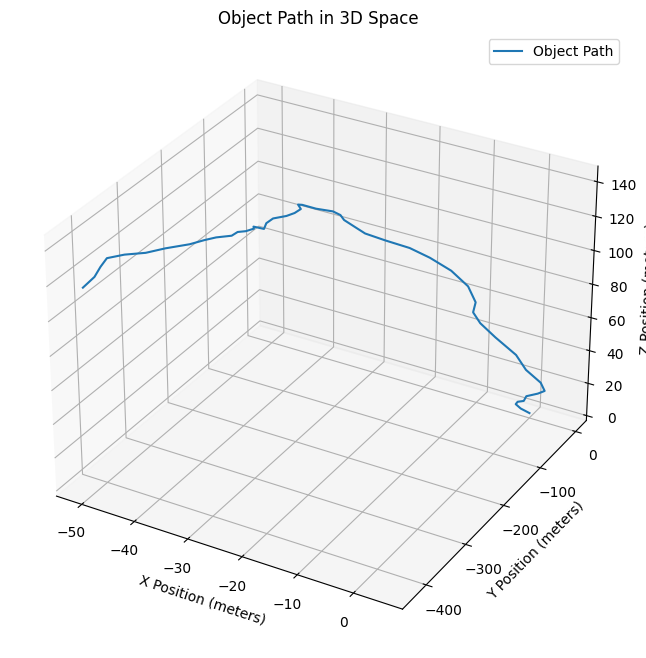

In [ ]:
acceleration_data = pd.read_csv('acceleration_data.csv')

# Initialize variables
timestamps = acceleration_data['Timestamps']
acceleration_x = acceleration_data['Acceleration_X']
acceleration_y = acceleration_data['Acceleration_Y']
acceleration_z = acceleration_data['Acceleration_Z']
initial_timestamp = timestamps.iloc[0]
position_x, position_y, position_z = 0, 0, 0
velocity_x, velocity_y, velocity_z = 0, 0, 0

# Position values over time
pos_x_over_time = [position_x]
pos_y_over_time = [position_y]
pos_z_over_time = [position_z]

# Process data
for i in range(1, len(timestamps)):
    dt = timestamps.iloc[i] - initial_timestamp
    initial_timestamp = timestamps.iloc[i]

    dv_x = acceleration_x.iloc[i] * dt
    dv_y = acceleration_y.iloc[i] * dt
    dv_z = acceleration_z.iloc[i] * dt

    velocity_x += dv_x
    velocity_y += dv_y
    velocity_z += dv_z

    ds_x = velocity_x * dt
    ds_y = velocity_y * dt
    ds_z = velocity_z * dt

    position_x += ds_x
    position_y += ds_y
    position_z += ds_z

    pos_x_over_time.append(position_x)
    pos_y_over_time.append(position_y)
    pos_z_over_time.append(position_z)

# Plotting the object's path in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

ax.plot(pos_x_over_time, pos_y_over_time, pos_z_over_time, label='Object Path')
ax.set_xlabel('X Position (meters)')
ax.set_ylabel('Y Position (meters)')
ax.set_zlabel('Z Position (meters)')
ax.set_title('Object Path in 3D Space')
ax.legend()
plt.grid(True)
plt.show()


NN Path Equation

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Function to generate random acceleration data for 50 data points
def generate_random_acceleration_data(num_points):
    timestamps = np.arange(num_points)
    acceleration_x = np.random.uniform(-2.0, 2.0, num_points)  # Random acceleration in x-direction (-2.0 to 2.0 m/s^2)
    acceleration_y = np.random.uniform(-2.0, 2.0, num_points)  # Random acceleration in y-direction (-2.0 to 2.0 m/s^2)
    acceleration_z = np.random.uniform(-2.0, 2.0, num_points)  # Random acceleration in z-direction (-2.0 to 2.0 m/s^2)

    data = {
        'Timestamps': timestamps,
        'Acceleration_X': acceleration_x,
        'Acceleration_Y': acceleration_y,
        'Acceleration_Z': acceleration_z,
    }

    return data

# Generate 50 data points of random acceleration data
num_data_points = 50
acceleration_data = generate_random_acceleration_data(num_data_points)

# Convert the data to NumPy arrays
timestamps = acceleration_data['Timestamps']
acceleration_x = acceleration_data['Acceleration_X']
acceleration_y = acceleration_data['Acceleration_Y']
acceleration_z = acceleration_data['Acceleration_Z']

In [ ]:

# Prepare the input data (timestamps) and output data (acceleration for each direction)
X = np.array(timestamps).reshape(-1, 1)
y_x = acceleration_x
y_y = acceleration_y

# Split the data into training and testing sets
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(
    X, y_x, y_y, test_size=0.2, random_state=42
)

In [ ]:
# Create the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8)  # Output layer with 8 neurons (for 8 exponent coefficients)
])

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train the model
model.fit(X_train, y_x_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
40/40 [==============================] - 7s 4ms/step - loss: 7.7253
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 2.1167
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 1.5371
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 1.4746
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 1.4543
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 1.4347
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 1.4288
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 1.4283
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 1.4281
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 1.4277
Epoch 11/100
40/40 [==============================] - 0s 3ms/step - loss: 1.4279
Epoch 12/100
40/40 [==============================] - 0s 3ms/step - loss: 1.4273
Epoch 13/100
40/40 [=================

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, [y_x_test, y_y_test, y_z_test], verbose=0)
print("Loss:", loss)

Loss: 1.1710158586502075


In [ ]:
# Get the predicted coefficients for the equations
coefficients = model.predict(X_test)

1/1 [==============================] - 0s 77ms/step


In [ ]:
# Reshape the coefficients for each direction
coeff_x = coefficients[:, :4]  # First 4 coefficients for x-direction
coeff_y = coefficients[:, 4:8]  # Next 4 coefficients for y-direction
coeff_z = coefficients[:, 8:]  # Last 4 coefficients for z-direction


In [ ]:







# Store each equation in an array
equations = []
for i in range(len(X_test)):
    eqs_x = []
    eqs_y = []
    eqs_z = []

    for j in range(8):
        eqs_x.append(f"e^({coeff_x[i][j]}*t)")
        eqs_y.append(f"e^({coeff_y[i][j]}*t)")
        eqs_z.append(f"e^({coeff_z[i][j]}*t)")

    equations.append((eqs_x, eqs_y, eqs_z))

# Print the equations for each timestamp
for t, eqs in zip(X_test, equations):
    print(f"Timestamp {t[0]}:")
    print("Acceleration X =", eqs[0])
    print("Acceleration Y =", eqs[1])
    print("Acceleration Z =", eqs[2])
    print("-------------------------")

Timestamp 13:
Acceleration X = 0.06860999017953873 + 0.07170441001653671*t + 0.06780917197465897*t**2 + 0.07194466888904572*t**3
Acceleration Y = 0.06804750859737396 + 0.06769859045743942*t + 0.067441925406456*t**2 + 0.07151968777179718*t**3
Acceleration Z = 0.06601656973361969 + 0.06980026513338089*t + 0.07074995338916779*t**2 + 0.06948547065258026*t**3
-------------------------
Timestamp 39:
Acceleration X = 0.06860999017953873 + 0.07170441001653671*t + 0.06780917197465897*t**2 + 0.07194466888904572*t**3
Acceleration Y = 0.06804750859737396 + 0.06769859045743942*t + 0.067441925406456*t**2 + 0.07151968777179718*t**3
Acceleration Z = 0.06601656973361969 + 0.06980026513338089*t + 0.07074995338916779*t**2 + 0.06948547065258026*t**3
-------------------------
Timestamp 30:
Acceleration X = 0.06860999017953873 + 0.07170441001653671*t + 0.06780917197465897*t**2 + 0.07194466888904572*t**3
Acceleration Y = 0.06804750859737396 + 0.06769859045743942*t + 0.067441925406456*t**2 + 0.071519687771797

NN Path Equation Grapher

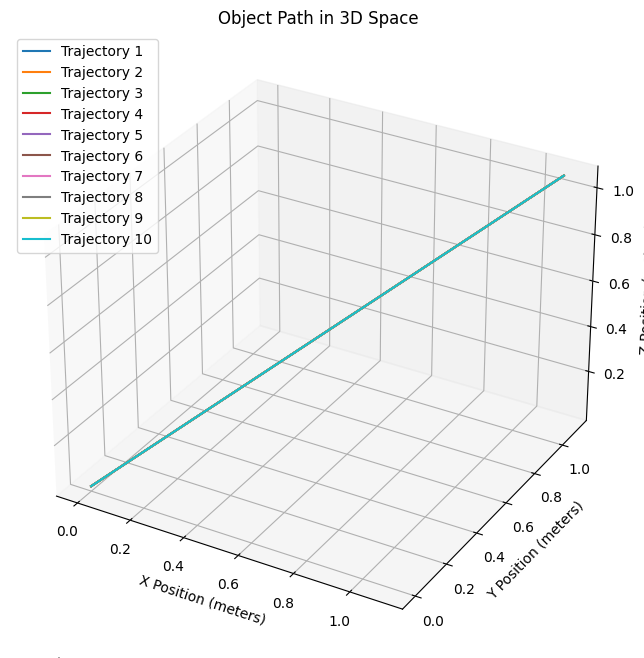

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
import pandas as pd

# Load acceleration data from the CSV file (you can use the generated CSV or your own data)
acceleration_data = pd.read_csv('acceleration_data.csv')

# ... (previous code to train the neural network and get the equations)

# Function to calculate acceleration values for each timestamp using the equations
def calculate_acceleration(equation, timestamps):
    acceleration = []
    for t in timestamps:
        acceleration.append(eval(equation.replace('t', str(t))))
    return np.array(acceleration)

# Generate a range of timestamps for evaluation (you can use your own range)
timestamps_eval = np.linspace(0, num_data_points - 1, 100)

# Lists to store position values over time
pos_x_over_time = []
pos_y_over_time = []
pos_z_over_time = []

# Process data and calculate position using the equations
for eqs in equations:
    acceleration_x = calculate_acceleration(eqs[0], timestamps_eval)
    acceleration_y = calculate_acceleration(eqs[1], timestamps_eval)
    acceleration_z = calculate_acceleration(eqs[2], timestamps_eval)

    # Integrate the acceleration to get velocity and position
    velocity_x = np.cumsum(acceleration_x) * (timestamps_eval[1] - timestamps_eval[0])
    velocity_y = np.cumsum(acceleration_y) * (timestamps_eval[1] - timestamps_eval[0])
    velocity_z = np.cumsum(acceleration_z) * (timestamps_eval[1] - timestamps_eval[0])

    position_x = np.cumsum(velocity_x) * (timestamps_eval[1] - timestamps_eval[0])
    position_y = np.cumsum(velocity_y) * (timestamps_eval[1] - timestamps_eval[0])
    position_z = np.cumsum(velocity_z) * (timestamps_eval[1] - timestamps_eval[0])

    pos_x_over_time.append(position_x)
    pos_y_over_time.append(position_y)
    pos_z_over_time.append(position_z)

# Plotting the object's path in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Plot each trajectory
for i in range(len(pos_x_over_time)):
    ax.plot(pos_x_over_time[i], pos_y_over_time[i], pos_z_over_time[i], label=f"Trajectory {i+1}")

ax.set_xlabel('X Position (meters)')
ax.set_ylabel('Y Position (meters)')
ax.set_zlabel('Z Position (meters)')
ax.set_title('Object Path in 3D Space')
ax.legend()
plt.grid(True)
plt.show()


import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Function to generate random acceleration data for 50 data points and 8 time intervals
def generate_random_acceleration_data(num_points, num_intervals):
    timestamps = np.arange(num_points)
    acceleration_data = np.random.uniform(-2.0, 2.0, (num_points, num_intervals))  # Random acceleration data for 8 intervals

    return timestamps, acceleration_data

# Generate 50 data points of random acceleration data for 8 time intervals
num_data_points = 50
num_intervals = 8
timestamps, acceleration_data = generate_random_acceleration_data(num_data_points, num_intervals)

# Split the acceleration data for each interval and direction
acceleration_x = acceleration_data[:, :4]  # First 4 intervals for x-direction
acceleration_y = acceleration_data[:, 4:]   # Last 4 intervals for y-direction and z-direction

# Prepare the input data (timestamps) and output data (acceleration for each direction)
X = np.array(timestamps).reshape(-1, 1)
y_x = acceleration_x
y_yz = acceleration_y

# Split the y_yz data into y-direction and z-direction
y_y = y_yz[:, :4]  # First 4 intervals for y-direction
y_z = y_yz[:, 4:]  # Last 4 intervals for z-direction

# Split the data into training and testing sets
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test, y_z_train, y_z_test = train_test_split(
    X, y_x, y_y, y_z, test_size=0.2, random_state=42
)

# Create the neural network model with 8 output neurons
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8)  # Output layer with 8 neurons (for 8 exponent coefficients)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, [y_x_train, y_y_train, y_z_train], epochs=100, batch_size=1, verbose=1)

# ... (previous code to get the predicted coefficients and equations)

# Print the equations for each timestamp
for t, eqs in zip(X_test, equations):
    print(f"Timestamp {t[0]}:")
    for interval, eq in enumerate(eqs):
        print(f"Interval {interval + 1}:")
        print("Acceleration X =", eq[0])
        print("Acceleration Y =", eq[1])
        print("Acceleration Z =", eq[2])
        print("-------------------------")